# Comparing the ages of clusters and asteroseismic stars with velocity dispersion ages.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import aviary as av
import starspot as ss

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 30,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [38]:
# Load clusters
# data0 = pd.read_csv("../../data/calibration_data.csv")
# m = np.isfinite(data0.teff.values) & np.isfinite(data0.period.values) & np.isfinite(data0.age_gyr.values) & (data0.teff.values > 3400)
# data = data0.iloc[m]
# prot, teff, age = data.period.values, data.teff.values, data.age_gyr.values

clusters = pd.read_csv("../../data/gyro_clusters_draft-2020April08.csv")
clusters.head()
prot, teff, age_myr = clusters.PROT.values, clusters.TEFF.values, clusters.AGE.values
age = age_myr * 1e-3

In [39]:
# Load asteroseismic stars.

ast = pd.read_csv("../../data/vanSaders.txt")
a_prot, a_teff, a_age = ast.period.values, ast.teff.values, ast.AMP_age.values

benchmark = pd.read_csv("../../data/curtis.csv", skiprows=51)
b_prot, b_teff, b_age = benchmark.prot.values, benchmark.teff.values, benchmark.age.values

Load velocity data.

In [40]:
gaia_mc = pd.read_csv("../all_rvs.csv")

# Drop rapid rotators
# m = (0.35 < gaia_mc.age.values) *  (gaia_mc.age.values < 6)
# gaia_mc = gaia_mc.iloc[m]

# Cut out photometric binaries and subgiants.
m = gaia_mc.flag.values == 1
gaia_mc = gaia_mc.iloc[m]

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Load cluster data.

In [25]:
# n11 = pd.read_csv("../../data/NGC6811_gaia.csv")
# pr = pd.read_csv("../../data/praesepe_teffs.csv")

Calculate velocity dispersions.

In [26]:
dt, dp = 500, .4
# dt, dp = 350, .3
# dt, dp = 300, .15

dispersions_bins = av.calc_dispersion_bins(gaia_mc.color_teffs.values,
                                            np.log10(gaia_mc.Prot.values),
                                            gaia_mc.all_vz.values,
                                            dt, dp, method="mad")

100%|██████████| 11532/11532 [00:02<00:00, 4676.04it/s]


Calculate kinematic ages.

In [27]:
p_mp, p_mr, p_a = av.get_avr_coefficients()
print(p_mp, p_mr, p_a)
kin_ages = av.v_to_age(dispersions_bins, p_a)

[ 0.94209334 -1.19176381] [ 1.57511484 -2.79934192] [ 1.23529167 -2.01979585]


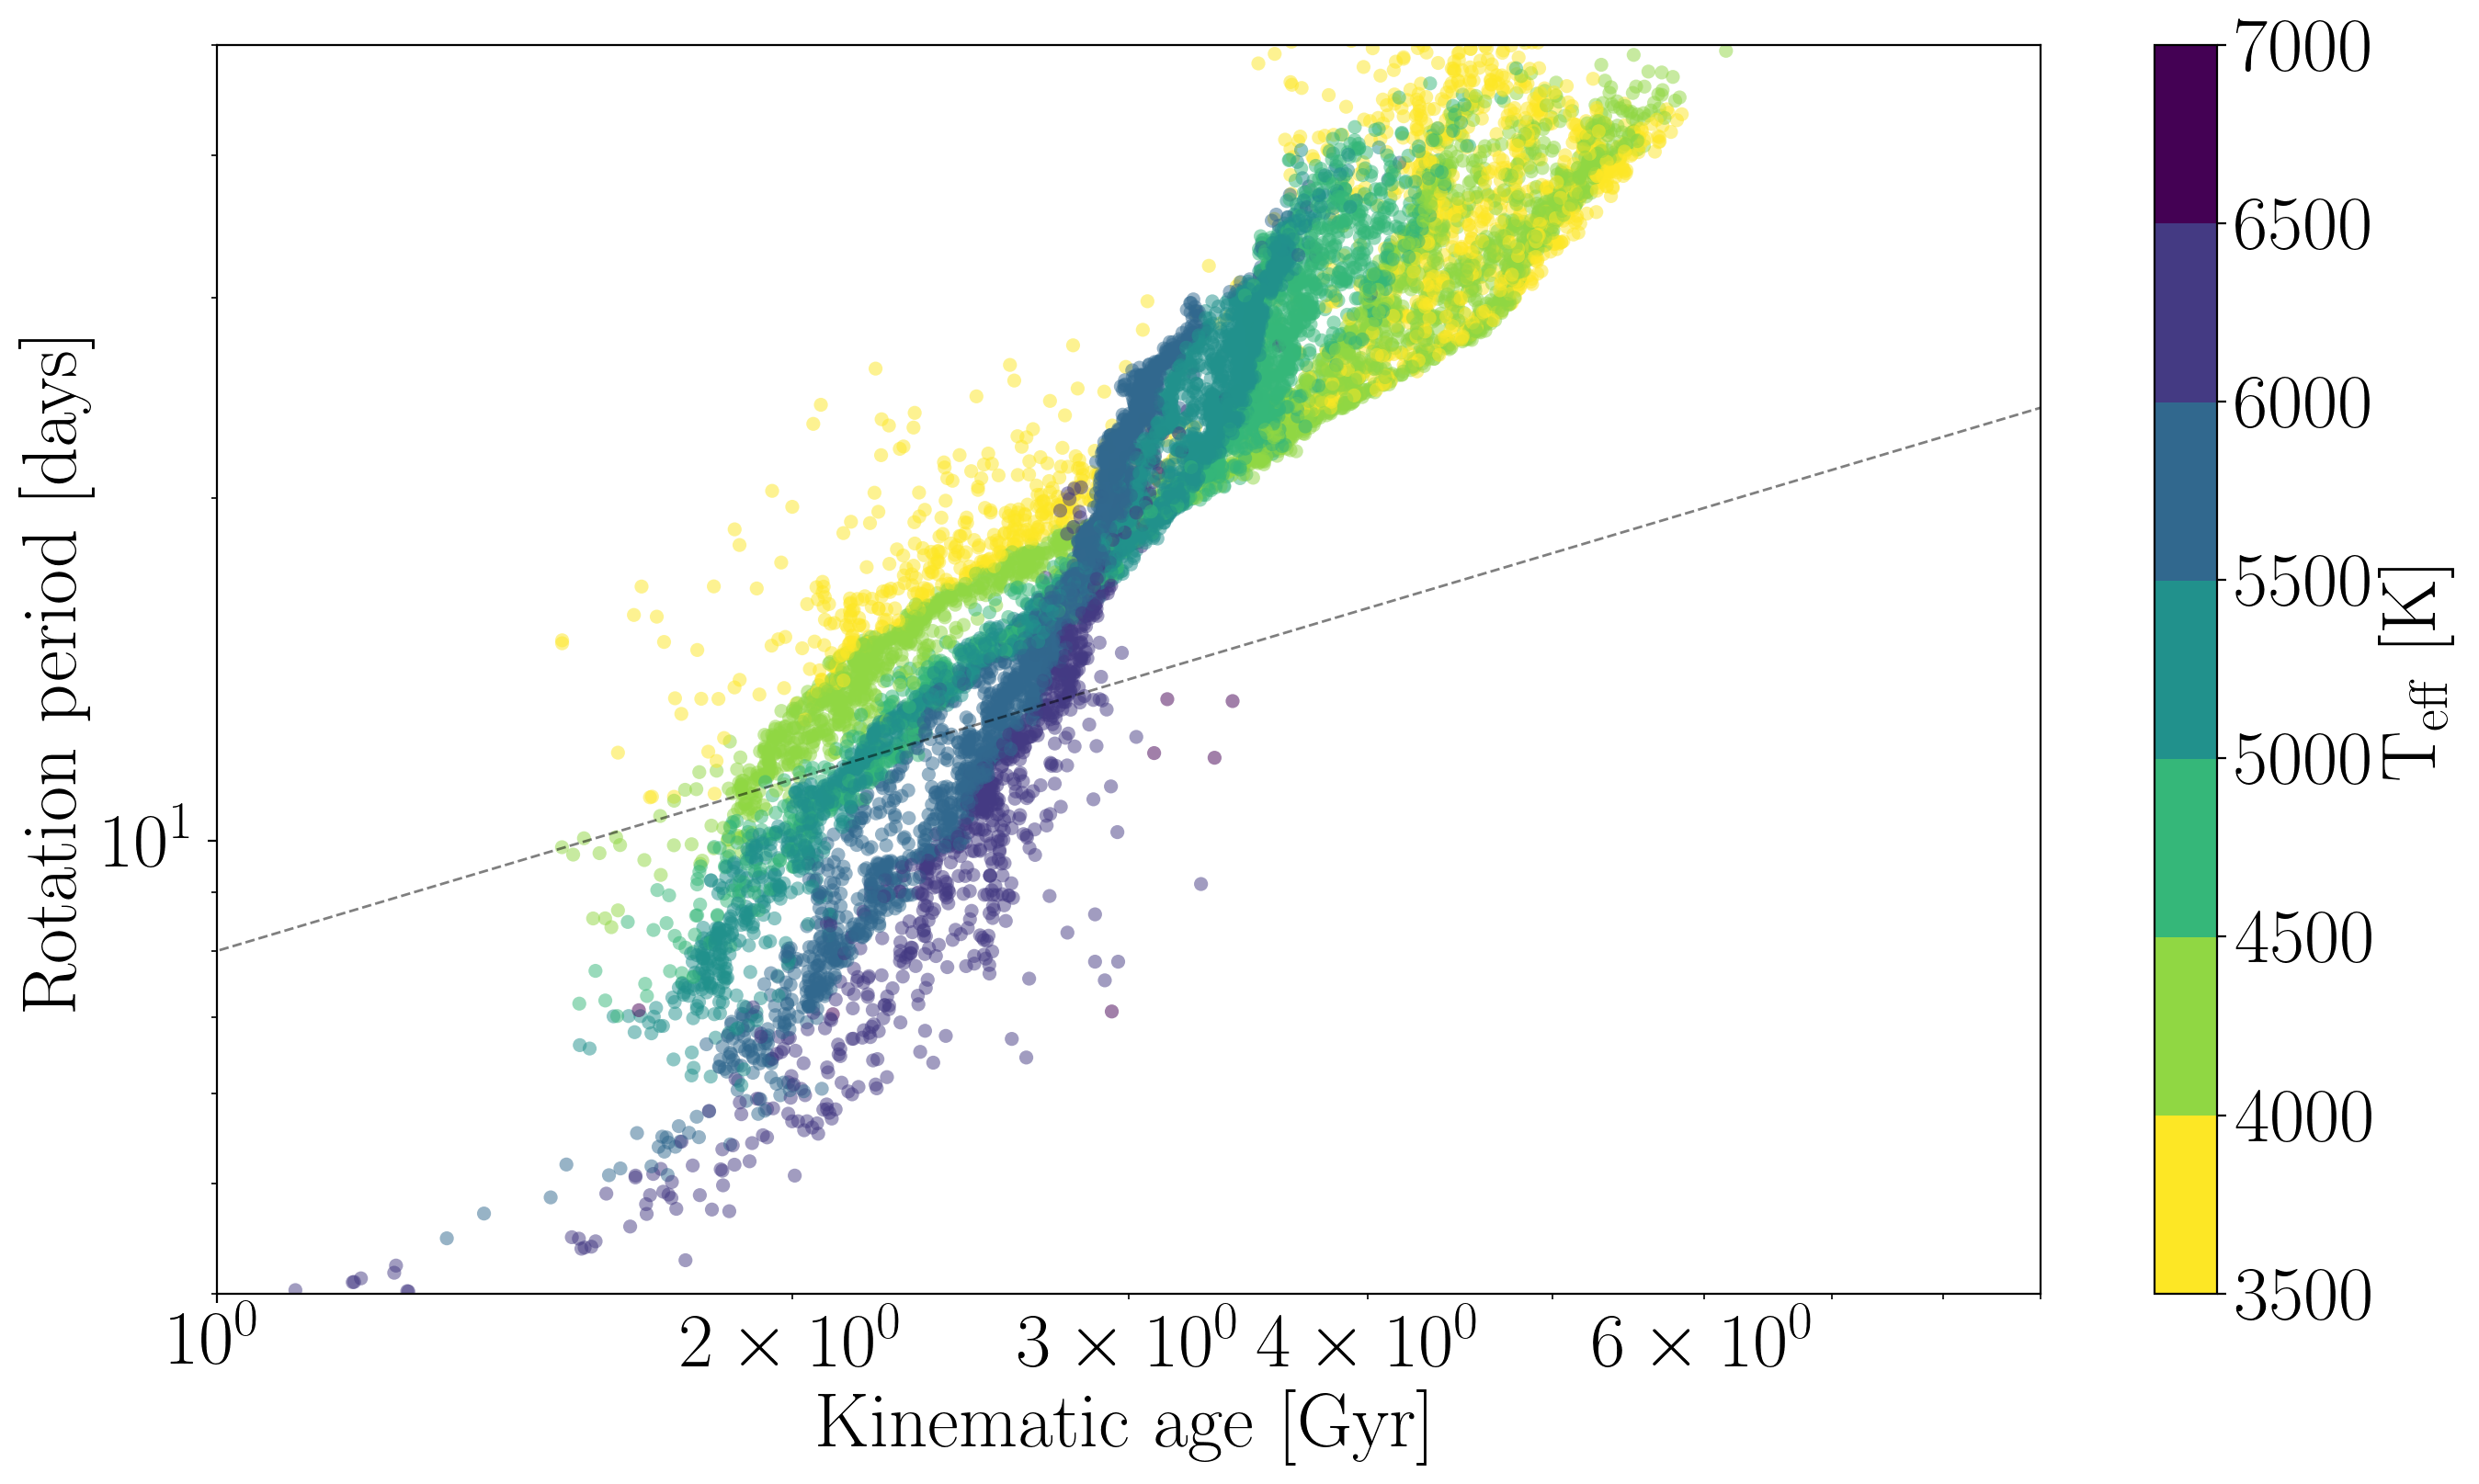

In [28]:
cmap = plt.cm.viridis_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(3500, 7000, 8)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(16, 9), dpi=200)

# Plot the kinematic data.
vmin, vmax = 3600, 7000
plt.scatter(kin_ages, gaia_mc.Prot, c=gaia_mc.color_teffs, vmin=vmin, vmax=vmax,
            cmap=cmap, norm=norm, alpha=.5, s=30, edgecolor="", rasterized=True)
cb = plt.colorbar(label="$\mathrm{T_{eff}~[K]}$")
cb.set_alpha(1)
cb.draw_all()

# Add the clusters.
# plt.scatter(np.ones_like(n11.teff)*1, n11.Per, c=n11.teff,
#             vmin=vmin, vmax=vmax, cmap=cmap, edgecolor="", alpha=.5, s=50)
# m3 = c=pr.teff > 3400
# plt.scatter(np.ones_like(pr.teff.values[m3])*.65, pr.Prot1.values[m3], c=pr.teff.values[m3],
#             vmin=vmin, vmax=vmax, cmap=cmap, edgecolor="", alpha=.5, s=50)

plt.xlabel("$\mathrm{Kinematic~age~[Gyr]}$")
plt.ylabel("$\mathrm{Rotation~period~[days]}$")
# plt.xlim(.5, 9)
plt.xlim(1, 9)
plt.ylim(4, 50)
plt.yscale("log")
plt.xscale("log")

xs = np.linspace(0, 10, 100)
plt.plot(xs, 8*xs**.5, "k", ls="--", lw=1, alpha=.5)
plt.savefig("kin_age_vs_prot")
plt.savefig("kin_age_vs_prot.pdf")

In [29]:
# age_lims = (.5, 2)
# m = (age_lims[0] < kin_ages) * (kin_ages < age_lims[1])

# age_lims = (4, 5)
# m2 = (age_lims[0] < kin_ages) * (kin_ages < age_lims[1])

# plt.figure(figsize=(16, 9), dpi=200)

# vmin, vmax = 0.5, 8
# plt.scatter(gaia_mc.color_teffs.values[m], gaia_mc.Prot.values[m],
#             c=kin_ages[m],
#             vmin=vmin, vmax=vmax, cmap="plasma_r")
# plt.scatter(gaia_mc.color_teffs.values[m2], gaia_mc.Prot.values[m2],
#             c=kin_ages[m2],
#             vmin=vmin, vmax=vmax, cmap="plasma_r")

# plt.scatter(n11.teff, n11.Per, c=np.ones_like(n11.teff)*1,
#             vmin=vmin, vmax=vmax, cmap="plasma_r")
# plt.scatter(pr.teff, pr.Prot1,c=np.ones_like(pr.teff)*.65,
#             vmin=vmin, vmax=vmax, cmap="plasma_r")
# plt.colorbar(label="$\mathrm{Age~[Gyr]}$")

# plt.xlim(7000, 3000);
# plt.yscale("log")
# plt.ylim(.1, 60)

# plt.xlabel("$\mathrm{T_{eff}~[K]}$")
# plt.ylabel("$\mathrm{Rotation~period~[days]}$")

In [30]:
# import seaborn

# # plt.figure(figsize=(8, 6))
# seaborn.jointplot(gaia_mc.color_teffs.values[m], np.log10(gaia_mc.Prot.values[m]), xlim=(7000, 3200))

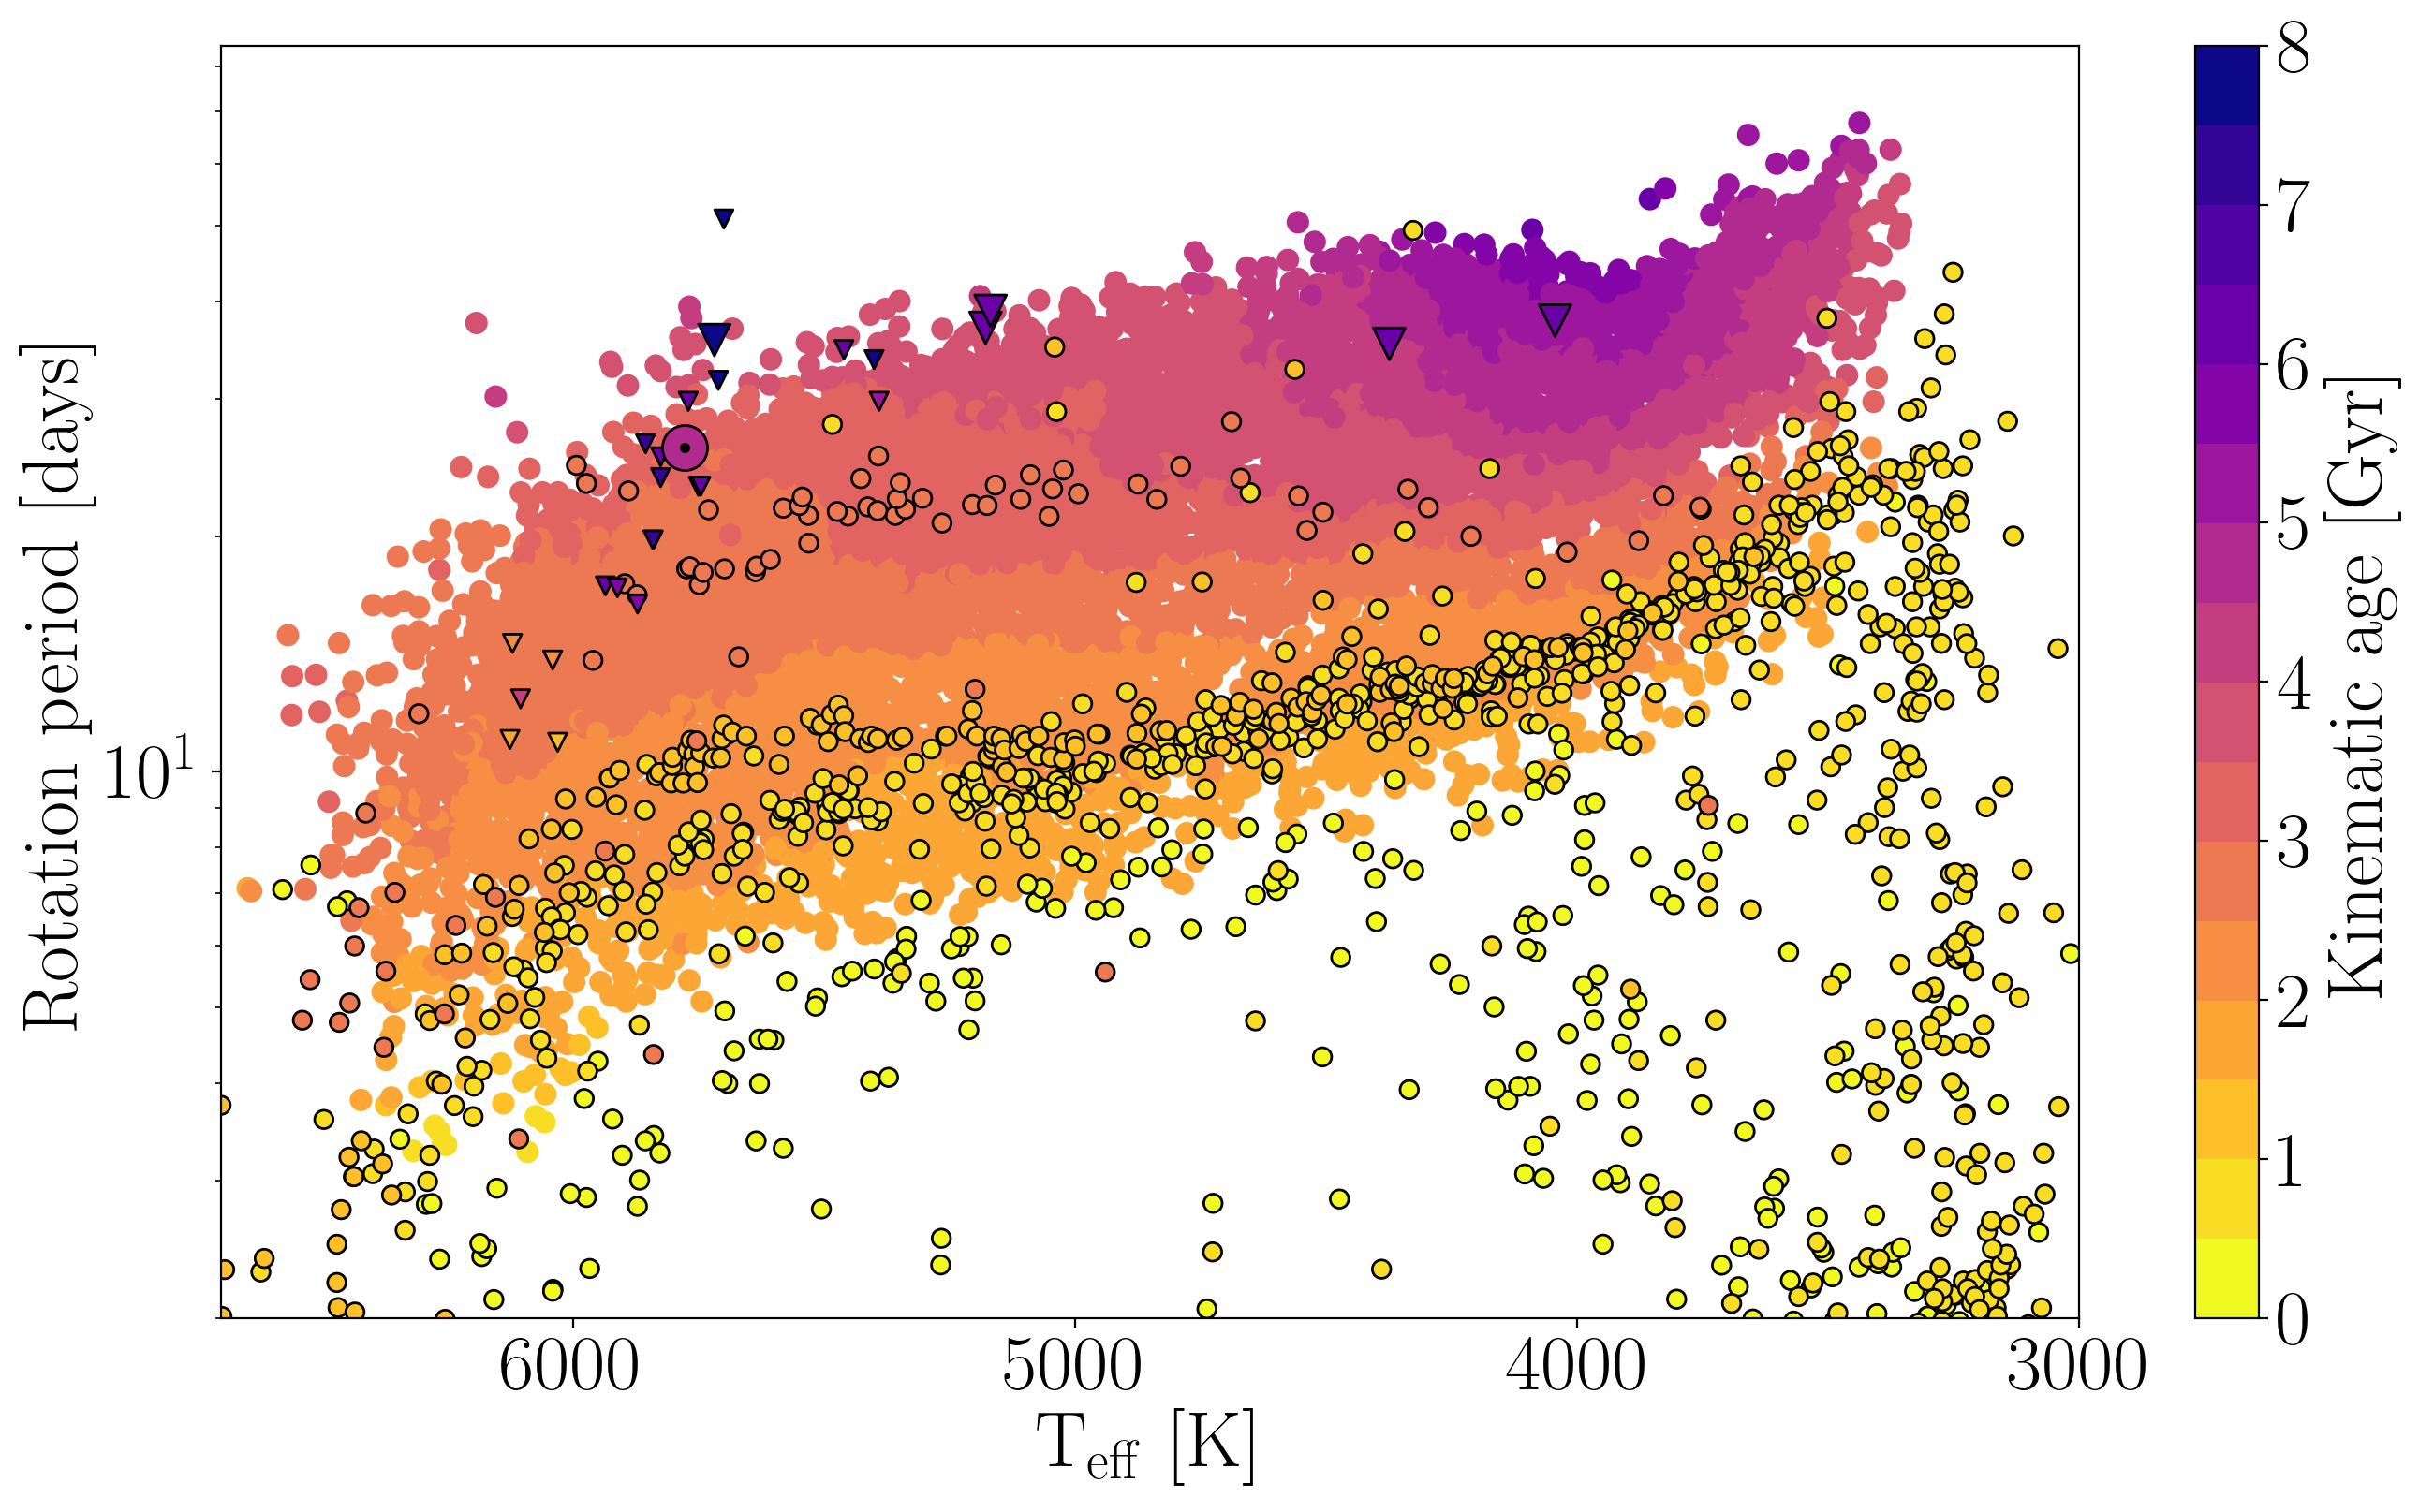

In [31]:
vmin, vmax = 0, 8

cmap = plt.cm.plasma_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(vmin, vmax, 17)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(16, 9), dpi=200)

plt.scatter(gaia_mc.color_teffs, gaia_mc.Prot, c=kin_ages, vmin=vmin, vmax=vmax,
            s=75, alpha=1, edgecolor="", cmap=cmap, norm=norm, zorder=1, rasterized=True)
plt.yscale("log")
plt.xlim(6550, 3200)
plt.xlabel("$\mathrm{T_{eff}~[K]}$")
plt.ylabel("$\mathrm{Rotation~period~[days]}$")

color_bar = plt.colorbar(label="$\mathrm{Kinematic~age~[Gyr]}$")
color_bar.set_alpha(1)
color_bar.draw_all()

xs = np.arange(3000, 6000, dt)
ys = 10**np.arange(1, 2, dp)
    
# xspot, yspot = 3400, 2
# xs = np.linspace(xspot, xspot+dt, 100)
# plt.fill_between(xs, yspot, 10**(np.log10(yspot) + dp), color="k", alpha=.2)

plt.ylim(2, 85)
plt.xlim(6700, 3000);

# plt.scatter(n11.teff, n11.Per, c=np.ones_like(n11.teff)*1, cmap=cmap, norm=norm, vmin=0, vmax=8, edgecolor="k")
# plt.scatter(pr.teff, pr.Prot1, c=np.ones_like(pr.teff)*.65, cmap=cmap, norm=norm, vmin=0, vmax=8, edgecolor="k")

# Add Jason's clusters
plt.scatter(teff, prot, c=age, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, s=50, edgecolor="k")

# Add asteroseismic stars from vansaders (Should check whether these would pass cuts)
plt.scatter(a_teff, a_prot, c=a_age, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, s=50, marker="v", edgecolor="k")

# Add benchmark stars from Jason, plus Lorenzo-Oliviera and the Sun
plt.scatter(b_teff[:-1], b_prot[:-1], c=b_age[:-1], cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, s=150, marker="v", edgecolor="k")
plt.scatter([b_teff[-1]], [b_prot[-1]], c=[b_age[-1]], cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, s=300, edgecolor="k")
plt.plot([b_teff[-1]], [b_prot[-1]], "k.")

plt.savefig("age_comparison")
plt.savefig("age_comparison.pdf")

Possible explanations for mismatch:

1) AVR is wrong or not compatible. -- test metal poor and all stars AVR. Perhaps I need to calibrate an AVR specifically for the Kepler field. The way to do this is to calculate the velocity dispersion of each cluster star (in exactly the same way you do it for the field), then fit a line :-). How will this work for the clusters that overlap?

2) Velocity dispersions do not represent ages for these field stars. Either because the populations are blended and there are lots of old stars (seems unlikely). Or because there are outliers (but I'm using MAD). Or because of the selection function: perhaps kinematically hotter stars are more likely to have measured periods (again, unlikely). Some other reasons?

3) The rotational evolution is different in the field than it is in clusters. This also seems far-fetched. Test with asteroseismic stars.

NEW APPROACH: JUST TAKE THE VDISPS OF THE BACKGROUND STARS AS CALCULATED ABOVE? 

Sigma clip Praesepe.

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RankWarning: Polyfit may be poorly conditioned
  from ipykernel import kernelapp as app


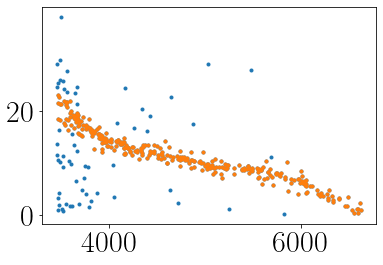

In [32]:
m_pr = (age == .67) * (teff > 3450)
t_pr, p_pr, a_pr = teff[m_pr], prot[m_pr], age[m_pr]
plt.plot(t_pr, p_pr, ".")

# Fit polynomials iteratively to sigma clip.
orders, nsigmas = [60, 7, 7], [4, 3.5, 3]

def iter_clip(t, p, a, orders, nsigmas):
    for i in range(3):
        c = np.polyfit(t, p, orders[i])
        m = ss.sigma_clip(p - np.polyval(c, t), nsigma=nsigmas[i])
        t, p, a = t[m], p[m], a[m]
    return t, p, a

t_pr, p_pr, a_pr = iter_clip(t_pr, p_pr, a_pr, orders, nsigmas)
plt.plot(t_pr, p_pr, ".")

Calc dispersions near praesepe stars.

In [33]:
pr_disps = av.calc_dispersion_bins_target(t_pr, p_pr, gaia_mc.color_teffs, gaia_mc.Prot, gaia_mc.all_vz, 500, .4)
pr_ages = av.v_to_age(pr_disps, p_a)

  0%|          | 0/309 [00:00<?, ?it/s]/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
100%|██████████| 309/309 [00:00<00:00, 674.21it/s]


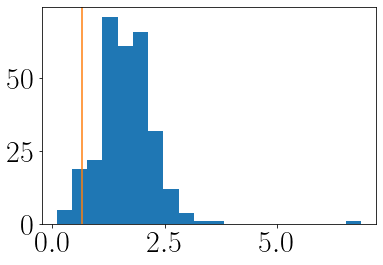

In [34]:
plt.hist(pr_ages, 20);
plt.axvline(a_pr[0], color="C1")

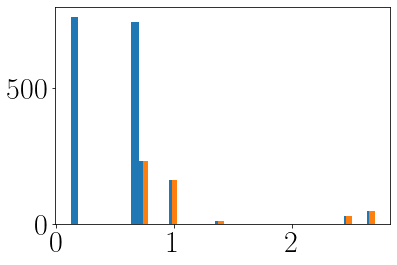

In [35]:
m = age > .67
plt.hist(age, 40);
plt.hist(age[m], 40);

Now calculate ages for cluster and asteroseismic stars.

In [36]:
# Add Jason's clusters
m = (age > .67) & (teff < 5000)
cool = gaia_mc.color_teffs.values < 5000
N = 50

dt, dp = 500, .4
p_mp, p_mr, p_a = av.get_avr_coefficients()

cluster_disps = av.calc_dispersion_bins_target(teff[m], prot[m], gaia_mc.color_teffs.values[cool],
                                               gaia_mc.Prot.values[cool], gaia_mc.all_vz.values[cool], dt, dp)
# cluster_disps = av.calc_dispersion_nearest_target(teff[m], prot[m], gaia_mc.color_teffs, gaia_mc.Prot, gaia_mc.basic_vz, N)

cluster_ages = av.v_to_age(cluster_disps, p_a)

# Add asteroseismic stars from vansaders (Should check whether these would pass cuts)
astero_disps = av.calc_dispersion_bins_target(a_teff, a_prot, gaia_mc.color_teffs.values[cool],
                                              gaia_mc.Prot.values[cool], gaia_mc.all_vz.values[cool], dt, dp)
# astero_disps = av.calc_dispersion_nearest_target(a_teff, a_prot, gaia_mc.color_teffs, gaia_mc.Prot, gaia_mc.basic_vz, N)
astero_ages = av.v_to_age(astero_disps, p_a)

bench_disps = av.calc_dispersion_bins_target(b_teff[:-1], b_prot[:-1], gaia_mc.color_teffs.values[cool],
                                             gaia_mc.Prot.values[cool], gaia_mc.all_vz.values[cool], dt, dp)
# bench_disps = av.calc_dispersion_nearest_target(b_teff[:-1], b_prot[:-1], gaia_mc.color_teffs, gaia_mc.Prot, gaia_mc.basic_vz, N)
bench_ages = av.v_to_age(bench_disps, p_a)

sun_disps = av.calc_dispersion_bins_target([b_teff[-1]], [b_prot[-1]], gaia_mc.color_teffs.values[cool],
                                           gaia_mc.Prot.values[cool], gaia_mc.all_vz.values[cool], dt, dp)
# sun_disps = av.calc_dispersion_nearest_target([b_teff[-1]], [b_prot[-1]], gaia_mc.color_teffs, gaia_mc.Prot, gaia_mc.basic_vz, N)
sun_ages = av.v_to_age(sun_disps, p_a)

100%|██████████| 1/1 [00:00<00:00, 2364.32it/s]


Text(0, 0.5, 'kinematic age')

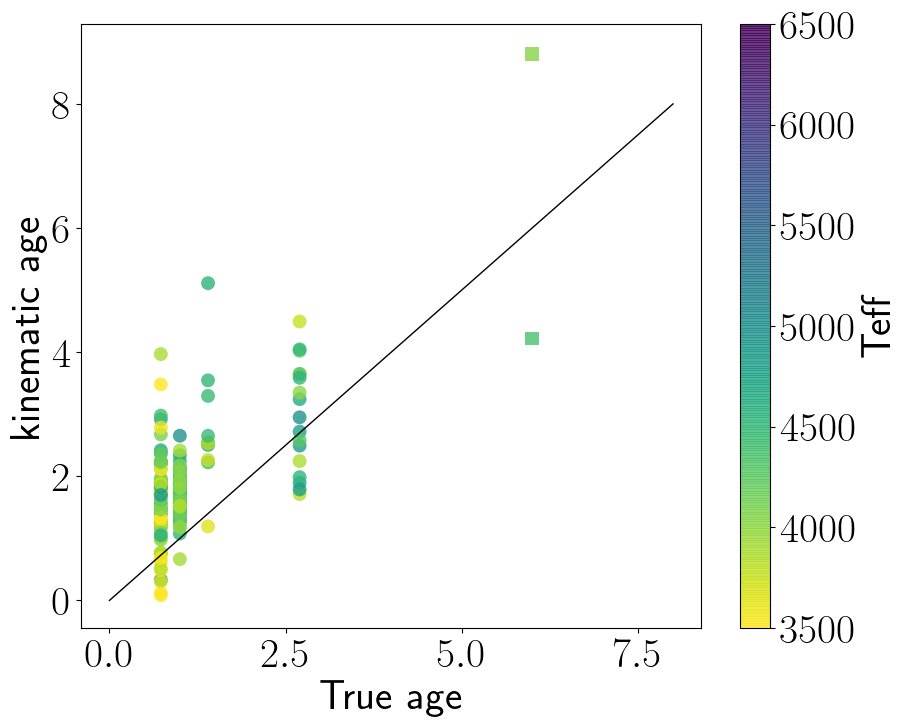

In [37]:
plt.figure(figsize=(10, 8), dpi=100)

vmin = 3500
vmax = 6500
alpha = .8
plt.scatter(age[m], cluster_ages, c=teff[m], marker="o", s=100, alpha=alpha, edgecolor="", vmin=vmin, vmax=vmax, cmap="viridis_r")
plt.scatter(a_age, astero_ages, c=a_teff, marker="^", s=100, alpha=alpha, edgecolor="", vmin=vmin, vmax=vmax, cmap="viridis_r")
plt.scatter(b_age[:-1], bench_ages, c=b_teff[:-1], marker="s", s=100, alpha=alpha, edgecolor="", vmin=vmin, vmax=vmax, cmap="viridis_r")
plt.scatter(4.56, sun_ages, c=[5777], marker="o", s=100, alpha=alpha, edgecolor="k", vmin=vmin, vmax=vmax, cmap="viridis_r")


# plt.scatter(age[m], cluster_disps, c=teff[m], marker="o", s=100, alpha=alpha, edgecolor="", vmin=vmin, vmax=vmax, cmap="viridis_r")
# plt.scatter(a_age, astero_disps, c=a_teff, marker="^", s=100, alpha=alpha, edgecolor="", vmin=vmin, vmax=vmax, cmap="viridis_r")
# plt.scatter(b_age[:-1], bench_disps, c=b_teff[:-1], marker="s", s=100, alpha=alpha, edgecolor="", vmin=vmin, vmax=vmax, cmap="viridis_r")
# plt.scatter(4.56, sun_disps, c=[5777], marker="o", s=100, alpha=alpha, edgecolor="k", vmin=vmin, vmax=vmax, cmap="viridis_r")
plt.colorbar(label="Teff")

xs = np.linspace(0, 8, 100)
plt.plot(xs, xs, "k", lw=1)

plt.xlabel("True age")
plt.ylabel("kinematic age")

In [22]:
mp = pd.read_csv('../../data/metal_poor_avr.csv')
mr = pd.read_csv('../../data/metal_rich_avr.csv')
a = pd.read_csv('../../data/all_stars_avr.csv')

p_mp = np.polyfit(np.log(mp.Age_Gyr), np.log(mp.sigma_z_kms), 1)
p_mr = np.polyfit(np.log(mr.Age_Gyr), np.log(mr.sigma_z_kms), 1)
p_a = np.polyfit(np.log(a.Age_Gyr), np.log(a.sigma_z_kms), 1)

In [26]:
print(p_mp[0], np.exp(p_mp[1]))

1.008329167484011 3.888091800035401


In [27]:
print(p_mr[0], np.exp(p_mr[1]))

0.5782092987858094 6.3821697655300875


In [28]:
print(p_a[0], np.exp(p_a[1]))

0.7648971600754376 5.473850946562764
